<a href="https://colab.research.google.com/github/YASHASSHETTYYY/blackDooT/blob/main/random_forest_churnp_rediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
import pandas as pd


uploaded = files.upload()


for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        data = pd.read_csv(file_name)
    elif file_name.endswith('.xlsx'):
        data = pd.read_excel(file_name)


print(data.head())


Saving Data-Resources (2).zip to Data-Resources (2).zip
  Customer_ID  Gender  Age  Married  State  Number_of_Referrals  \
0   12257-ASS       0   39        0      1                    9   
1   13946-HAR       0   41        1     10                    1   
2   14567-TAM       1   43        0     21                    1   
3   15591-KAR       0   26        0     14                    3   
4   15803-UTT       0   34        0      3                    6   

   Tenure_in_Months  Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                 1           0              1               0  ...   
1                 3           1              1               0  ...   
2                 9           0              1               0  ...   
3                31           0              1               0  ...   
4                31           0              1               0  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0              1      19.549999     19.549999      

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


print(data.isnull().sum())


data = data.fillna(0)

label_encoder = LabelEncoder()


data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['State'] = label_encoder.fit_transform(data['State'])
data['Churn_Category'] = label_encoder.fit_transform(data['Churn_Category'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Phone_Service'] = label_encoder.fit_transform(data['Phone_Service'])
data['Multiple_Lines'] = label_encoder.fit_transform(data['Multiple_Lines'])
data['Payment_Method'] = label_encoder.fit_transform(data['Payment_Method'])
data['Churn_Reason'] = label_encoder.fit_transform(data['Churn_Reason'])


X = data.drop(['Customer_ID', 'Churn_Category'], axis=1)
y = data['Churn_Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")


Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

ValueError: could not convert string to float: 'Yes'

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = data.fillna(0)


selected_columns = ['Payment_Method', 'Monthly_Charge', 'Total_Charges',
                    'Total_Long_Distance_Charges', 'Total_Revenue', 'Churn_Category']

data_selected = data[selected_columns]


label_encoder = LabelEncoder()


data_selected['Payment_Method'] = label_encoder.fit_transform(data_selected['Payment_Method'].astype(str))


X = data_selected.drop('Churn_Category', axis=1)
y = data_selected['Churn_Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model on selected features: {accuracy * 100:.2f}%")


Accuracy of Random Forest model on selected features: 100.00%


<ipython-input-23-08635676bbd9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Payment_Method'] = label_encoder.fit_transform(data_selected['Payment_Method'].astype(str))


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)


print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 100.00%
Standard deviation of accuracy: 0.00%


In [25]:

rf_model_tuned = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)


rf_model_tuned.fit(X_train, y_train)

cv_scores_tuned = cross_val_score(rf_model_tuned, X, y, cv=5)


print(f"Tuned model cross-validation scores: {cv_scores_tuned}")
print(f"Mean accuracy: {cv_scores_tuned.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores_tuned.std() * 100:.2f}%")


Tuned model cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 100.00%
Standard deviation of accuracy: 0.00%


In [26]:

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix['Churn_Category'].sort_values(ascending=False))

Gender                        NaN
Age                           NaN
Married                       NaN
State                         NaN
Number_of_Referrals           NaN
Tenure_in_Months              NaN
Value_Deal                    NaN
Phone_Service                 NaN
Multiple_Lines                NaN
Payment_Method                NaN
Monthly_Charge                NaN
Total_Charges                 NaN
Total_Refunds                 NaN
Total_Extra_Data_Charges      NaN
Total_Long_Distance_Charges   NaN
Total_Revenue                 NaN
Churn_Category                NaN
Churn_Reason                  NaN
Name: Churn_Category, dtype: float64


In [27]:

print(data.isnull().sum())


Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [12]:

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix['Churn_Category'].sort_values(ascending=False))

Gender                        NaN
Age                           NaN
Married                       NaN
State                         NaN
Number_of_Referrals           NaN
Tenure_in_Months              NaN
Value_Deal                    NaN
Phone_Service                 NaN
Multiple_Lines                NaN
Payment_Method                NaN
Monthly_Charge                NaN
Total_Charges                 NaN
Total_Refunds                 NaN
Total_Extra_Data_Charges      NaN
Total_Long_Distance_Charges   NaN
Total_Revenue                 NaN
Churn_Category                NaN
Churn_Reason                  NaN
Name: Churn_Category, dtype: float64


In [13]:

print(data['Churn_Category'].value_counts())


Churn_Category
0    411
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rf_model, X, y, cv=skf)

print(f"Stratified Cross-validation scores: {cross_val_scores}")
print(f"Mean accuracy: {cross_val_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cross_val_scores.std() * 100:.2f}%")


Stratified Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 100.00%
Standard deviation of accuracy: 0.00%


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 100.00%


In [16]:

y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Test accuracy: 100.00%


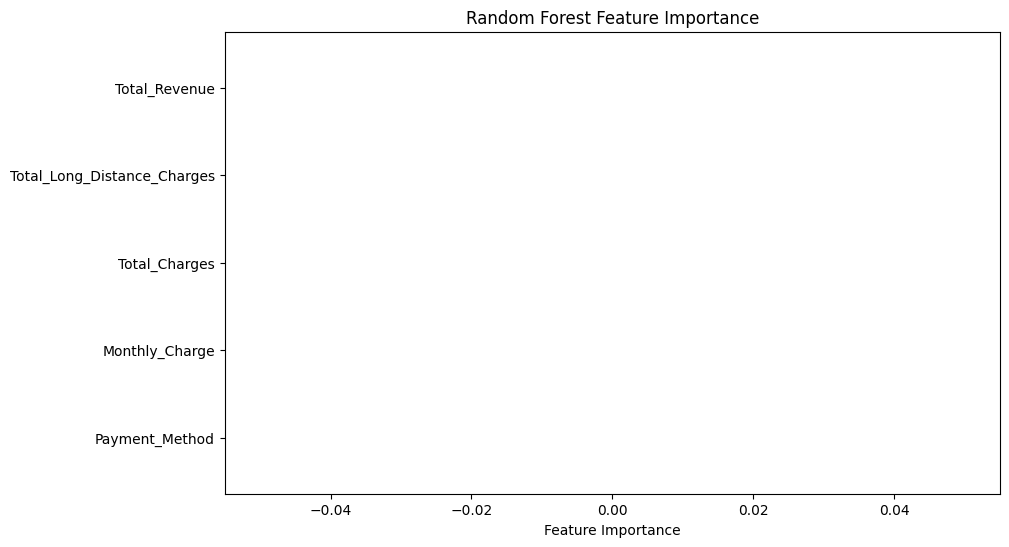

In [17]:
import matplotlib.pyplot as plt
feature_importances = grid_search.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


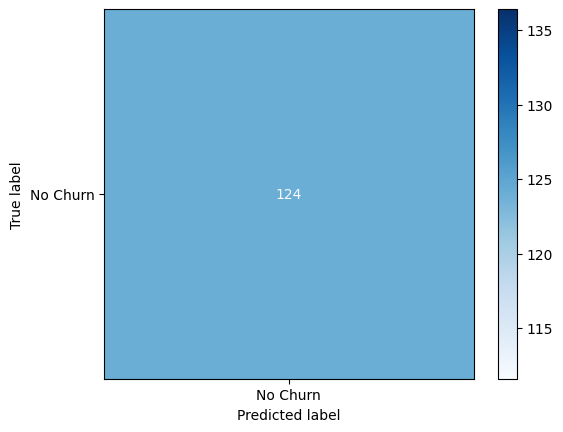

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn"])
disp.plot(cmap="Blues")
plt.show()

In [20]:
print(y_train.value_counts())


Churn_Category
0    287
Name: count, dtype: int64
